Hello, bonjour, hola, konnichiwa, and welcome!

Here I am learning about the basic structure of a PyTorch model. 


* I am going to create my own data. -----..->>>> Getting my data ready
* Split the data into train and test. ------>>>> Getting my data ready
*.................
* define a function using to plot the data. -->>> Visualize the  data
* ..................
* Build a LinearRegressionModel class -------->>>>> Build a Model
* ...................
* Prediction with torch.inference_mode() & plot this to see how wrong  the prediction  is! 
* ...................
* loss function & optimizer setup ------>>>>>>>>>>> Train the model
* training Loop ----------------->>>>>>>>>>>>>>>>>> Train the model




In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#Data Import Or Preparation

In [3]:
weight =0.7
bias=0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight*X+bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
split_no= int(0.8* len(X))
X_train, y_train= X[:split_no],y[:split_no]
X_test, y_test = X[split_no:],y[split_no:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

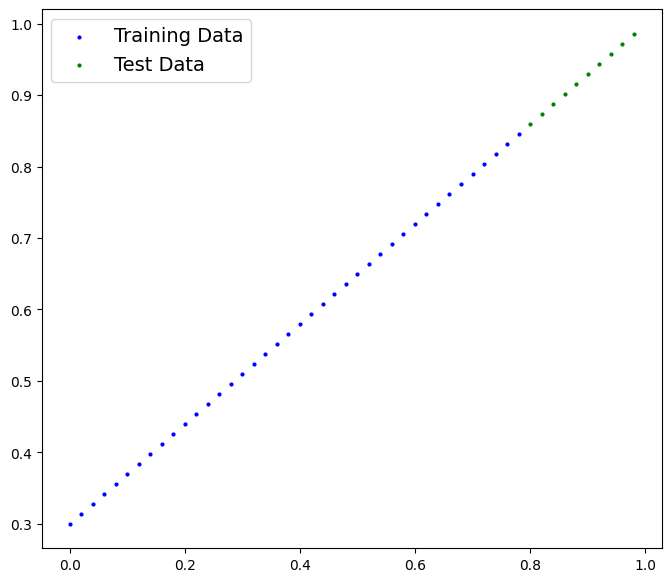

In [31]:
def plot_data(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictionpore=None):
  plt.figure(figsize=(8,7))

  plt.scatter(train_data, train_labels,c="b", s=4, label="Training Data")
  
  plt.scatter(test_data, test_labels,c="g", s=4, label="Test Data")

  if predictionpore is not None:
    plt.scatter(test_data, predictionpore, c="r", s=4, label="Prediction")

  plt.legend(prop={"size": 14});

plot_data();


#Build Model

In [6]:
 class LinearRegressionModel(nn.Module):
  
  def __init__(self):
    super().__init__()
    
    self.weights=nn.Parameter(torch.randn(1, dtype=torch.float),
                              requires_grad=True)
    
    self.bias=nn.Parameter(torch.randn(1, dtype=torch.float),
                              requires_grad=True)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weights*x + self.bias                            
    

In [21]:
model1=LinearRegressionModel()

list(model1.parameters())

[Parameter containing:
 tensor([0.2732], requires_grad=True),
 Parameter containing:
 tensor([-1.6931], requires_grad=True)]

In [22]:
model1.state_dict()

OrderedDict([('weights', tensor([0.2732])), ('bias', tensor([-1.6931]))])

#Prediction

In [23]:
with torch.inference_mode():
  y_predict=model1(X_test)

In [24]:
print(f"Number of testing sample:{len(X_test)}")
print(f"Number of prediction sample:{len(y_predict)}")
print(f"predicted values{y_predict}")

Number of testing sample:10
Number of prediction sample:10
predicted valuestensor([[-1.4746],
        [-1.4691],
        [-1.4636],
        [-1.4582],
        [-1.4527],
        [-1.4472],
        [-1.4418],
        [-1.4363],
        [-1.4309],
        [-1.4254]])


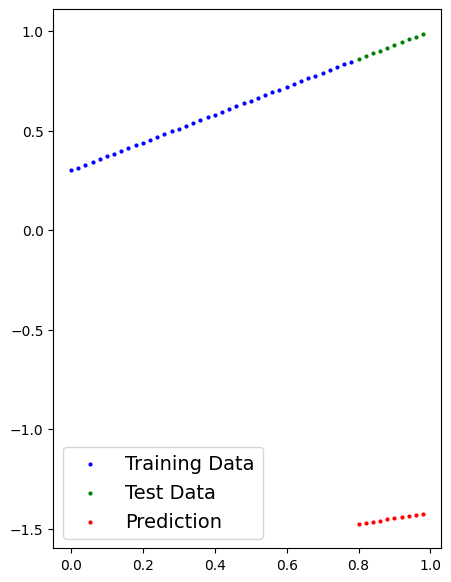

In [25]:
plot_data(predictionpore=y_predict)

#Train Model

In [26]:
loss_function= nn.L1Loss()

optimizer=torch.optim.SGD(params=model1.parameters(), lr=0.01)

In [27]:

epochs=200

train_loss_values = []
test_loss_values = []
epoch_count = []

#training------------------>>>>>>>>>>>>>>>>>>>>>>>>>>

for epoch in range(epochs):
  model1.train()

  y_pred=model1(X_train)

  train_loss=loss_function(y_pred, y_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  model1.eval()

#testing------------------>>>>>>>>>>>>>>>>>>>>>>>>>>

  with torch.inference_mode():
    test_pred=model1(X_test)
    
    test_loss = loss_function(test_pred, y_test.type(torch.float))

    if epoch%10==0:
      epoch_count.append(epoch)
    
      train_loss_values.append(train_loss.detach().numpy())

      test_loss_values.append(test_loss.detach().numpy())

      print(f"Epoch:{epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss}")  

Epoch:0 | MAE Train Loss: 2.1595799922943115 | MAE Test Loss: 2.3595101833343506
Epoch:10 | MAE Train Loss: 2.044370174407959 | MAE Test Loss: 2.2248003482818604
Epoch:20 | MAE Train Loss: 1.9291601181030273 | MAE Test Loss: 2.09009051322937
Epoch:30 | MAE Train Loss: 1.8139503002166748 | MAE Test Loss: 1.9553807973861694
Epoch:40 | MAE Train Loss: 1.6987406015396118 | MAE Test Loss: 1.8206708431243896
Epoch:50 | MAE Train Loss: 1.5835306644439697 | MAE Test Loss: 1.685961127281189
Epoch:60 | MAE Train Loss: 1.4683207273483276 | MAE Test Loss: 1.5512511730194092
Epoch:70 | MAE Train Loss: 1.353110909461975 | MAE Test Loss: 1.416541337966919
Epoch:80 | MAE Train Loss: 1.237900972366333 | MAE Test Loss: 1.2818315029144287
Epoch:90 | MAE Train Loss: 1.12269127368927 | MAE Test Loss: 1.1471216678619385
Epoch:100 | MAE Train Loss: 1.0074812173843384 | MAE Test Loss: 1.0124119520187378
Epoch:110 | MAE Train Loss: 0.8922713994979858 | MAE Test Loss: 0.8777021169662476
Epoch:120 | MAE Train Lo

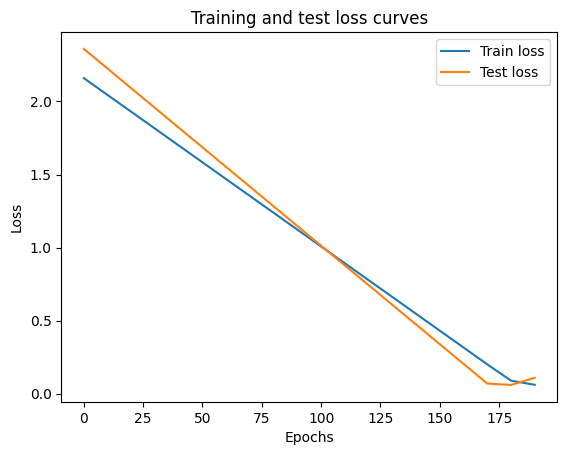

In [28]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [29]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.9696])), ('bias', tensor([0.1789]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [30]:
model1.eval()

with torch.inference_mode():
  y_preds=model1(X_test)

y_preds

tensor([[0.9546],
        [0.9740],
        [0.9934],
        [1.0128],
        [1.0321],
        [1.0515],
        [1.0709],
        [1.0903],
        [1.1097],
        [1.1291]])

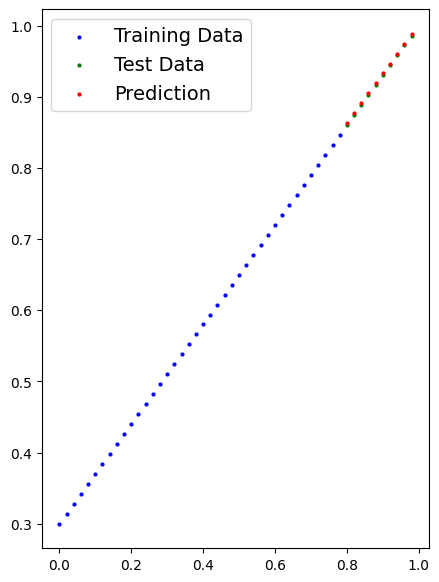

In [20]:
plot_data(predictionpore=y_preds)